<a href="https://colab.research.google.com/github/SiddR610/AI_Notes/blob/main/graph_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Graph coloring with 3 colors:
Vertex 1 is colored with color 1
Vertex 2 is colored with color 2
Vertex 3 is colored with color 3
Vertex 4 is colored with color 2


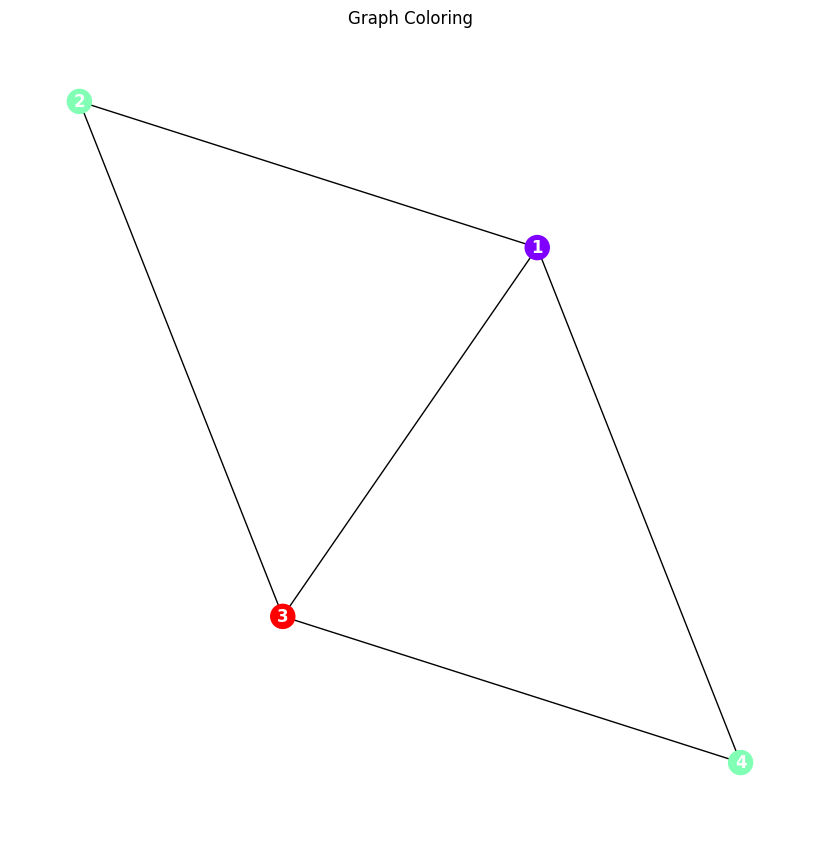

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

class GraphColoringAgent:
    def __init__(self, graph):
        self.graph = graph
        self.num_vertices = len(graph)
        self.colors = [0] * self.num_vertices

    def is_safe(self, vertex, color, c):
        for i in range(self.num_vertices):
            if self.graph[vertex][i] == 1 and color[i] == c:
                return False
        return True

    def graph_coloring_util(self, m, vertex):
        if vertex == self.num_vertices:
            return True

        for c in range(1, m+1):
            if self.is_safe(vertex, self.colors, c):
                self.colors[vertex] = c
                if self.graph_coloring_util(m, vertex + 1):
                    return True
                self.colors[vertex] = 0

        return False

    def graph_coloring(self, m):
        if not self.graph_coloring_util(m, 0):
            print("Solution does not exist.")
            return False

        print("Graph coloring with {} colors:".format(m))
        for i in range(self.num_vertices):
            print("Vertex {} is colored with color {}".format(i + 1, self.colors[i]))

        self.visualize_graph()

    def visualize_graph(self):
        G = nx.Graph()
        for i in range(self.num_vertices):
            G.add_node(i + 1)

        for i in range(self.num_vertices):
            for j in range(i + 1, self.num_vertices):
                if self.graph[i][j] == 1:
                    G.add_edge(i + 1, j + 1)

        pos = nx.spring_layout(G)
        node_colors = [self.colors[i] for i in range(self.num_vertices)]

        plt.figure(figsize=(8, 8))
        nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow, font_color='white', font_weight='bold')
        plt.title("Graph Coloring")
        plt.show()


# Example usage
if __name__ == "__main__":
    # Define an example graph as an adjacency matrix
    example_graph = [
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [1, 1, 0, 1],
        [1, 0, 1, 0]
    ]

    # Create a GraphColoringAgent instance
    coloring_agent = GraphColoringAgent(example_graph)

    # Specify the number of colors available
    num_colors = 3

    # Find a valid coloring with the specified number of colors and visualize the graph
    coloring_agent.graph_coloring(num_colors)
